In [ ]:
import pandas as pd
df = pd.read_csv("diamonds.csv")
print("Data types of columns:")
print(df.dtypes)
print("First 10 rows of the dataset:")
print(df.head(10))

# ------------------------------
numeric_columns = ["carat", "depth", "table", "price", "x", "y", "z"]
categorical_unordered = ["clarity"]
categorical_ordered = ["cut", "color"]

print("\nNumeric Columns:", numeric_columns)
print("Categorical (Unordered):", categorical_unordered)
print("Categorical (Ordered):", categorical_ordered)

cut_categories = ["Fair", "Good", "Very Good", "Premium", "Ideal"]
color_categories = ["J", "I", "H", "G", "F", "E", "D"]

df["cut"] = pd.Categorical(df["cut"], categories=cut_categories, ordered=True)
df["color"] = pd.Categorical(df["color"], categories=color_categories, ordered=True)

print("\nData types after conversion:")
print(df.dtypes)
print("\nDiamonds with cut better than 'Good':")
print(df[df["cut"] > "Good"].head(10))
df_raw = pd.read_csv("diamonds.csv")  # reload original for comparison

print("\nMemory usage before converting categories:")
print(df_raw.memory_usage(deep=True))

print("\nMemory usage after converting categories:")
print(df.memory_usage(deep=True))


Data types of columns:
Unnamed: 0      int64
carat         float64
cut            object
color          object
clarity        object
depth         float64
table         float64
price           int64
x             float64
y             float64
z             float64
dtype: object
First 10 rows of the dataset:
   Unnamed: 0  carat        cut color clarity  depth  table  price     x  \
0           1   0.23      Ideal     E     SI2   61.5   55.0    326  3.95   
1           2   0.21    Premium     E     SI1   59.8   61.0    326  3.89   
2           3   0.23       Good     E     VS1   56.9   65.0    327  4.05   
3           4   0.29    Premium     I     VS2   62.4   58.0    334  4.20   
4           5   0.31       Good     J     SI2   63.3   58.0    335  4.34   
5           6   0.24  Very Good     J    VVS2   62.8   57.0    336  3.94   
6           7   0.24  Very Good     I    VVS1   62.3   57.0    336  3.95   
7           8   0.26  Very Good     H     SI1   61.9   55.0    337  4.07   
8      

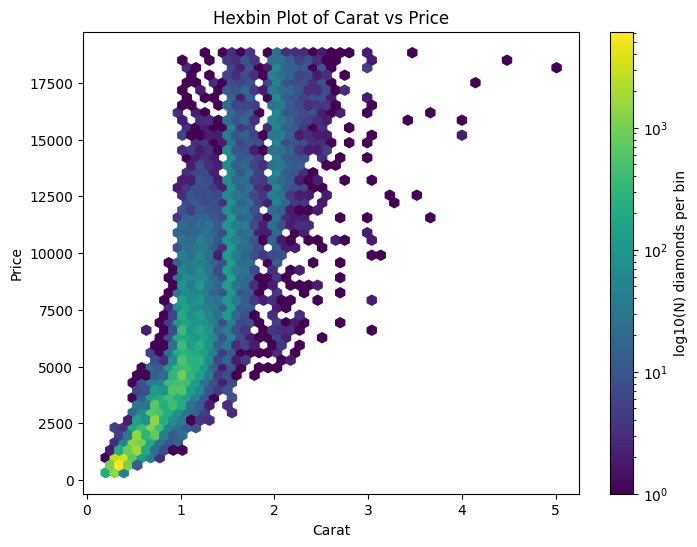

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("diamonds.csv")

plt.figure(figsize=(8,6))
hb = plt.hexbin(df['carat'], df['price'], gridsize=50, cmap='viridis', bins='log')
plt.colorbar(hb, label='log10(N) diamonds per bin')
plt.xlabel('Carat')
plt.ylabel('Price')
plt.title('Hexbin Plot of Carat vs Price')
plt.show()




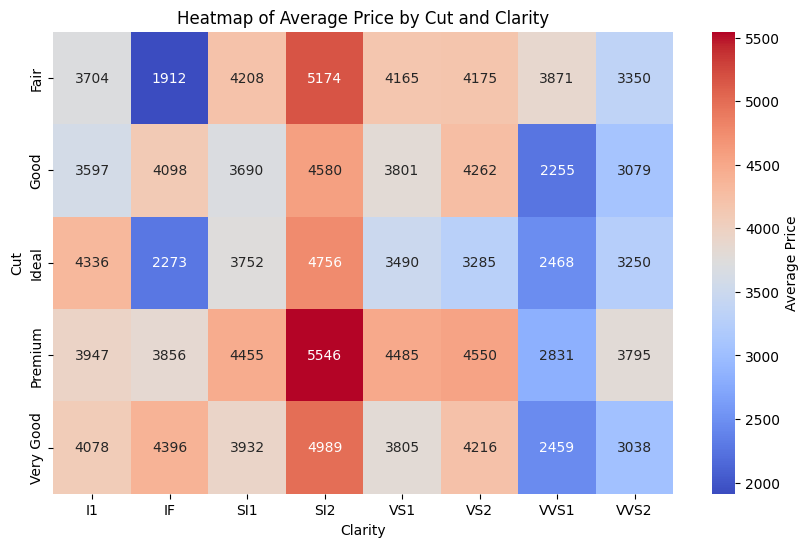

In [ ]:
pivot_table = df.pivot_table(values='price', index='cut', columns='clarity', aggfunc='mean')

plt.figure(figsize=(10,6))
sns.heatmap(pivot_table, annot=True, fmt=".0f", cmap="coolwarm", cbar_kws={'label': 'Average Price'})
plt.title('Heatmap of Average Price by Cut and Clarity')
plt.ylabel('Cut')
plt.xlabel('Clarity')
plt.show()

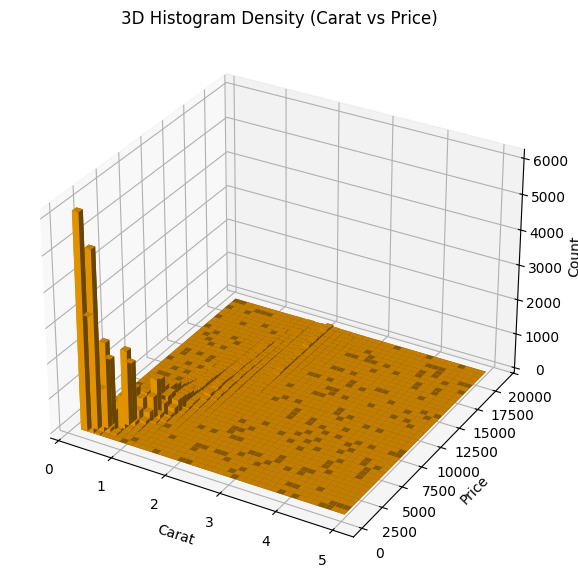

In [ ]:
plt.figure(figsize=(10,7))
ax = plt.subplot(111, projection='3d')

# Data for histogram
x = df['carat']
y = df['price']

# 2D histogram
hist, xedges, yedges = np.histogram2d(x, y, bins=(40, 40))

# Create meshgrid for bar positions
xpos, ypos = np.meshgrid(xedges[:-1], yedges[:-1], indexing="ij")
xpos = xpos.ravel()
ypos = ypos.ravel()
zpos = np.zeros_like(xpos)

# Bar dimensions
dx = (xedges[1] - xedges[0]) * np.ones_like(zpos)
dy = (yedges[1] - yedges[0]) * np.ones_like(zpos)
dz = hist.ravel()

# Plot bars
ax.bar3d(xpos, ypos, zpos, dx, dy, dz, shade=True, color="orange")

# Labels
ax.set_xlabel('Carat')
ax.set_ylabel('Price')
ax.set_zlabel('Count')
ax.set_title('3D Histogram Density (Carat vs Price)')

plt.show()

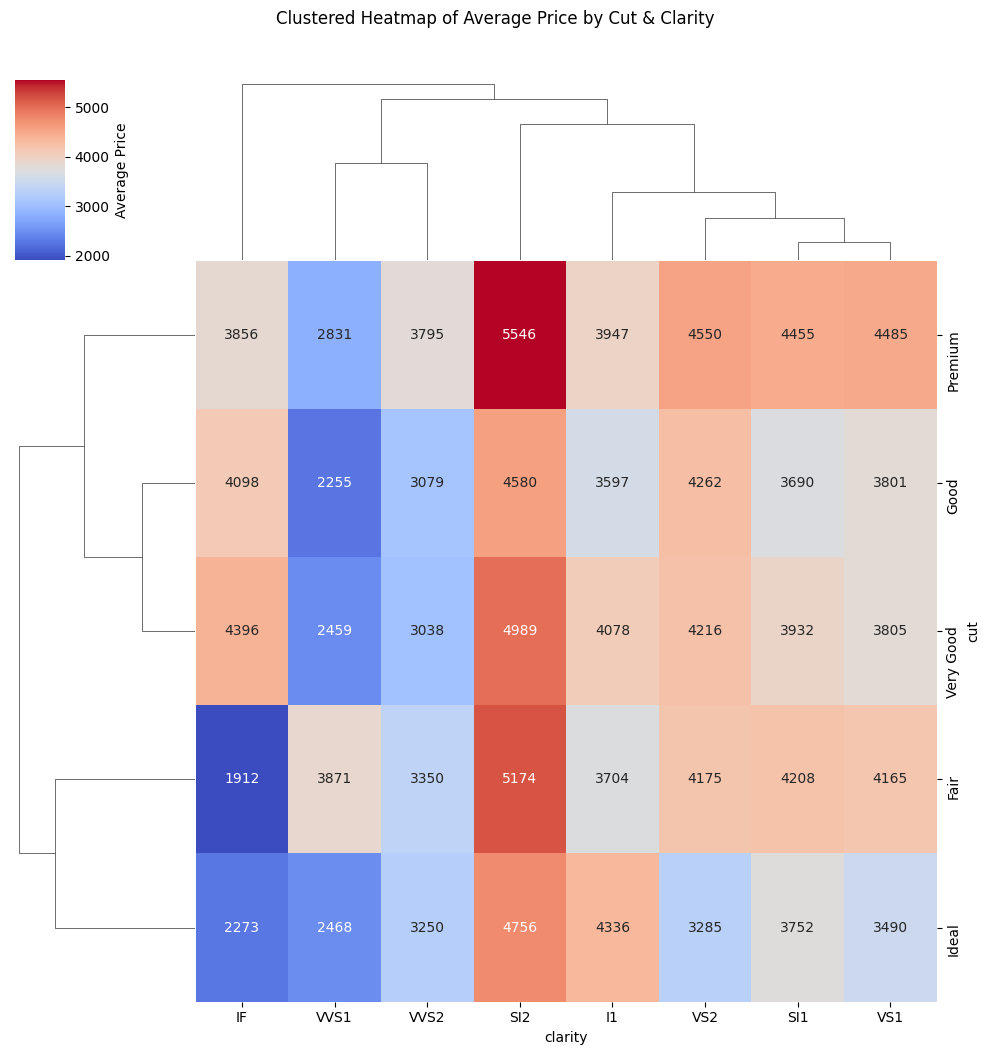

In [ ]:
# Clustered Heatmap
sns.clustermap(pivot_table, cmap="coolwarm", annot=True, fmt=".0f", cbar_kws={'label': 'Average Price'})
plt.suptitle('Clustered Heatmap of Average Price by Cut & Clarity', y=1.05)
plt.show()

In [14]:
df["price_per_carat"] = df["price"] / df["carat"]
# ------------------------------
# Condition 1: price_per_carat > 8000
# Condition 2: cut = Ideal
# Condition 3: clarity >= VS1 (need ordered category for clarity)
clarity_order = ["I1", "SI2", "SI1", "VS2", "VS1", "VVS2", "VVS1", "IF"]
df["clarity"] = pd.Categorical(df["clarity"], categories=clarity_order, ordered=True)

# Apply filters
filtered_df = df[
    (df["price_per_carat"] > 8000) &
    (df["cut"] == "Ideal") &
    (df["clarity"] >= "VS1")
]
avg_carat_filtered = filtered_df["carat"].mean()
median_price_filtered = filtered_df["price"].median()
avg_carat_all = df["carat"].mean()
median_price_all = df["price"].median()

print("Filtered Diamonds - Average Carat:", avg_carat_filtered)
print("Filtered Diamonds - Median Price:", median_price_filtered)

print("\nDataset-wide - Average Carat:", avg_carat_all)
print("Dataset-wide - Median Price:", median_price_all)
if avg_carat_filtered < avg_carat_all and median_price_filtered > median_price_all:
    print("\nInsight: High price_per_carat diamonds are smaller but much higher quality.")

Filtered Diamonds - Average Carat: 1.249093050647821
Filtered Diamonds - Median Price: 11206.0

Dataset-wide - Average Carat: 0.7979397478680014
Dataset-wide - Median Price: 2401.0


In [16]:
pivot_avg_price = df.pivot_table(values="price", index="cut", columns="clarity", aggfunc="mean")
print("Pivot Table - Average Price by Cut & Clarity:")
print(pivot_avg_price)


Pivot Table - Average Price by Cut & Clarity:
clarity             I1          SI2          SI1          VS2          VS1  \
cut                                                                          
Fair       3703.533333  5173.916309  4208.279412  4174.724138  4165.141176   
Good       3596.635417  4580.260870  3689.533333  4262.236196  3801.445988   
Ideal      4335.726027  4755.952656  3752.118169  3284.550385  3489.744497   
Premium    3947.331707  5545.936928  4455.269371  4550.331248  4485.462041   
Very Good  4078.226190  4988.688095  3932.391049  4215.759552  3805.353239   

clarity           VVS2         VVS1           IF  
cut                                               
Fair       3349.768116  3871.352941  1912.333333  
Good       3079.108392  2254.774194  4098.323944  
Ideal      3250.290100  2468.129458  2272.913366  
Premium    3795.122989  2831.206169  3856.143478  
Very Good  3037.765182  2459.441065  4396.216418  


/tmp/ipython-input-1828820282.py:1: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot_avg_price = df.pivot_table(values="price", index="cut", columns="clarity", aggfunc="mean")


In [35]:

# Task 2: Pivot with mean & median price_per_carat
pivot_price_per_carat = df.pivot_table( values="price_per_carat", index="cut", columns="clarity", aggfunc=["mean", "median"] )
print("\nPivot Table - Mean & Median Price per Carat by Cut & Clarity:")
print(pivot_price_per_carat)


Pivot Table - Mean & Median Price per Carat by Cut & Clarity:
                  mean                                                      \
clarity             I1           IF          SI1          SI2          VS1   
cut                                                                          
Fair       2408.676999  3941.261734  3881.119492  3849.518043  4097.220119   
Good       2732.777457  5072.769322  3647.980407  3790.378698  4055.895913   
Ideal      3287.589725  3850.829216  3775.626371  3947.685121  4042.249781   
Premium    2810.755709  4849.732259  4043.922586  4162.311539  4444.214243   
Very Good  2948.736120  5399.240302  3823.951469  4025.606183  4104.368772   

                                                       median               \
clarity            VS2         VVS1         VVS2           I1           IF   
cut                                                                          
Fair       4125.850868  4804.241185  4225.642956  2312.037520  4026.666667   


In [20]:

# Task 3: Skewness check (clarity-wise difference between mean & median)
# Group only by clarity (ignoring cut for skewness analysis)
clarity_stats = df.groupby("clarity")["price_per_carat"].agg(["mean", "median"])
clarity_stats["diff"] = clarity_stats["mean"] - clarity_stats["median"]

print("\nClarity Levels - Difference Between Mean & Median (Skewness Indicator):")
print(clarity_stats.sort_values("diff", ascending=False))

# Identify clarity with max skewness
max_skew_clarity = clarity_stats["diff"].idxmax()
print(f"\nClarity level with biggest skewness: {max_skew_clarity}")


Clarity Levels - Difference Between Mean & Median (Skewness Indicator):
                mean       median         diff
clarity                                       
IF       4259.931736  3156.458333  1103.473403
VVS2     4204.166013  3168.750000  1035.416013
VVS1     3851.410558  2982.352941   869.057617
VS1      4155.816808  3450.000000   705.816808
VS2      4080.526787  3428.571429   651.955358
SI1      3849.078018  3669.444444   179.633574
SI2      4010.853865  3951.300674    59.553191
I1       2796.296437  2887.387387   -91.090950

Clarity level with biggest skewness: IF


/tmp/ipython-input-2840034573.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  clarity_stats = df.groupby("clarity")["price_per_carat"].agg(["mean", "median"])


In [21]:
color_group = df.groupby("color").agg(
    avg_price=("price", "mean"),
    avg_carat=("carat", "mean"),
    count=("price", "count")
).reset_index()

print("Grouping by Color - Average Price, Average Carat, Count:")
print(color_group)

Grouping by Color - Average Price, Average Carat, Count:
  color    avg_price  avg_carat  count
0     D  3169.954096   0.657795   6775
1     E  3076.752475   0.657867   9797
2     F  3724.886397   0.736538   9542
3     G  3999.135671   0.771190  11292
4     H  4486.669196   0.911799   8304
5     I  5091.874954   1.026927   5422
6     J  5323.818020   1.162137   2808


In [22]:
# Task 2: Ranking by average price_per_carat
# ------------------------------
color_rank = df.groupby("color")["price_per_carat"].mean().reset_index()
color_rank["rank"] = color_rank["price_per_carat"].rank(ascending=False, method="dense")
color_rank = color_rank.sort_values("rank")

print("\nRanking by Average Price per Carat:")
print(color_rank)


Ranking by Average Price per Carat:
  color  price_per_carat  rank
3     G      4163.411524   1.0
2     F      4134.730684   2.0
4     H      4008.026941   3.0
5     I      3996.402051   4.0
0     D      3952.564280   5.0
6     J      3825.649192   6.0
1     E      3804.611475   7.0


In [23]:

# Task 3: Group by cut & color, max average price
cut_color_group = df.groupby(["cut", "color"])["price"].mean().reset_index()
max_combo = cut_color_group.loc[cut_color_group["price"].idxmax()]

print("\nCut & Color Combination with Maximum Average Price:")
print(max_combo)


Cut & Color Combination with Maximum Average Price:
cut          Premium
color              J
price    6294.591584
Name: 27, dtype: object


In [25]:
large_diamonds = df[df["carat"] > 2]

# Most common clarity in large diamonds
most_common_clarity = large_diamonds["clarity"].value_counts().idxmax()

# Average price per carat for large diamonds
avg_ppc_large = large_diamonds["price_per_carat"].mean()

print("Most common clarity (carat > 2):", most_common_clarity)
print("Average price per carat (carat > 2):", avg_ppc_large)





Most common clarity (carat > 2): SI2
Average price per carat (carat > 2): 6997.49954779344


In [26]:
# Task 2: Premium vs Ideal Cuts (by color)
# ------------------------------
cut_color_ppc = df[df["cut"].isin(["Premium", "Ideal"])] \
    .groupby(["cut", "color"])["price_per_carat"].mean().reset_index()

print("\nAverage Price per Carat by Cut & Color (Premium vs Ideal):")
print(cut_color_ppc)


Average Price per Carat by Cut & Color (Premium vs Ideal):
        cut color  price_per_carat
0     Ideal     D      3806.532106
1     Ideal     E      3683.171591
2     Ideal     F      4097.519455
3     Ideal     G      4163.998740
4     Ideal     H      3846.065529
5     Ideal     I      3808.070973
6     Ideal     J      3733.765935
7   Premium     D      4111.564944
8   Premium     E      3987.881020
9   Premium     F      4357.804505
10  Premium     G      4320.505678
11  Premium     H      4278.491444
12  Premium     I      4267.221626
13  Premium     J      4140.517668


In [27]:

# Task 3: Top 3 clarity levels by median price
clarity_median = df.groupby("clarity")["price"].median().reset_index()
top3_clarity = clarity_median.sort_values("price", ascending=False).head(3)

print("\nTop 3 Clarity Levels by Median Price:")
print(top3_clarity)



Top 3 Clarity Levels by Median Price:
  clarity   price
1     SI2  4072.0
0      I1  3344.0
2     SI1  2822.0


/tmp/ipython-input-3338990802.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  clarity_median = df.groupby("clarity")["price"].median().reset_index()


In [29]:
# Task 4: Insights (printed automatically)
# ------------------------------
insights = [
    "1. Large diamonds (carat > 2) often have limited clarity grades available; average price_per_carat is lower compared to smaller, higher quality stones.",
    "2. Ideal cuts generally achieve higher price_per_carat, but Premium cut can outperform for certain colors (e.g., E/F).",
    "3. Clarity strongly influences pricing skewness — top clarity levels (like IF, VVS1) dominate median prices, showing quality sometimes matters more than cut."
]

print("\nInsights:")
for i in insights:
    print(i)


Insights:
1. Large diamonds (carat > 2) often have limited clarity grades available; average price_per_carat is lower compared to smaller, higher quality stones.
2. Ideal cuts generally achieve higher price_per_carat, but Premium cut can outperform for certain colors (e.g., E/F).
3. Clarity strongly influences pricing skewness — top clarity levels (like IF, VVS1) dominate median prices, showing quality sometimes matters more than cut.


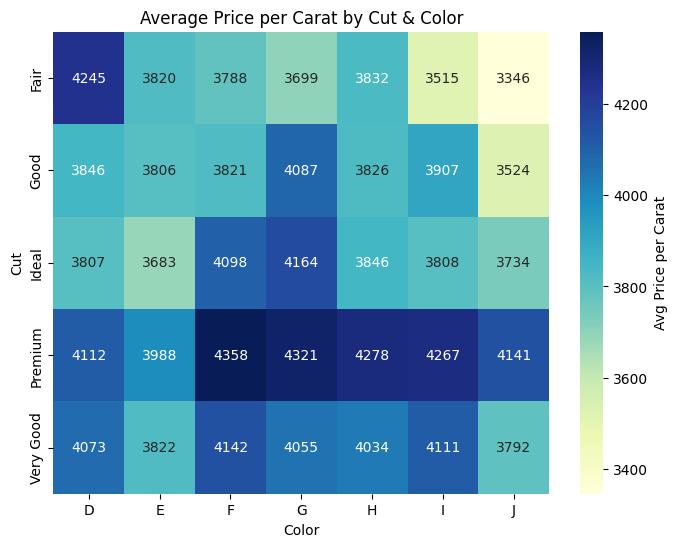

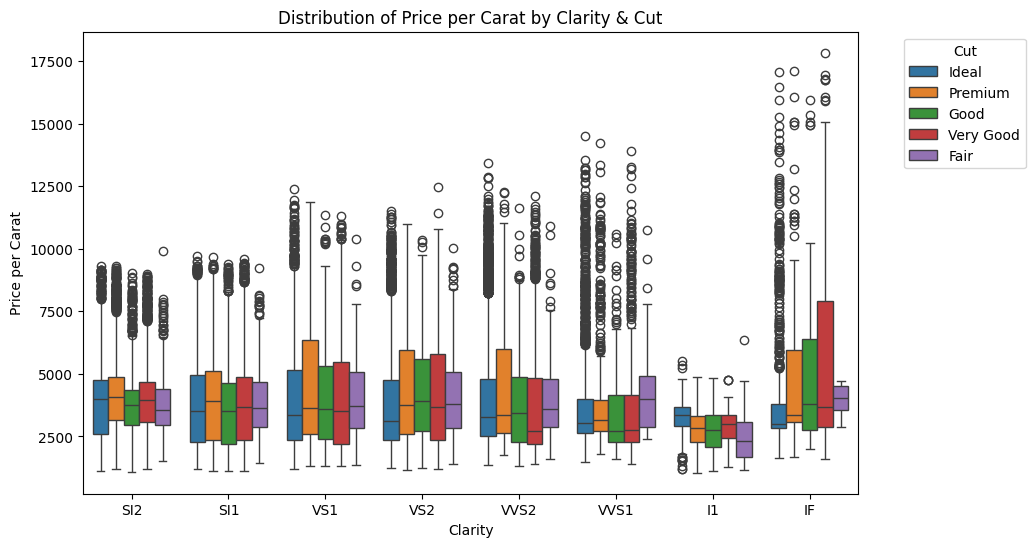

In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Load dataset
df = pd.read_csv("diamonds.csv")
df["price_per_carat"] = df["price"] / df["carat"]

# ------------------------------
# Viz 1: Heatmap of Price per Carat (Cut × Color)
# ------------------------------
pivot_cut_color = df.pivot_table(values="price_per_carat", index="cut", columns="color", aggfunc="mean")

plt.figure(figsize=(8,6))
sns.heatmap(pivot_cut_color, annot=True, fmt=".0f", cmap="YlGnBu", cbar_kws={'label': 'Avg Price per Carat'})
plt.title("Average Price per Carat by Cut & Color")
plt.ylabel("Cut")
plt.xlabel("Color")
plt.show()

# ------------------------------
# Viz 2: Boxplot (Clarity vs Price per Carat, colored by Cut)
# ------------------------------
plt.figure(figsize=(10,6))
sns.boxplot(data=df, x="clarity", y="price_per_carat", hue="cut")
plt.title("Distribution of Price per Carat by Clarity & Cut")
plt.ylabel("Price per Carat")
plt.xlabel("Clarity")
plt.legend(title="Cut", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.show()

# ------------------------------
# Viz 3: Interactive 3D Scatter (Carat vs Price vs Price/Carat, colored by Clarity)
# ------------------------------
fig = px.scatter_3d(
    df.sample(5000),  # sample to avoid lag
    x="carat", y="price", z="price_per_carat",
    color="clarity", symbol="cut",
    opacity=0.7, size="carat",
    title="3D Scatter: Carat vs Price vs Price per Carat"
)
fig.show()


/tmp/ipython-input-2794816870.py:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




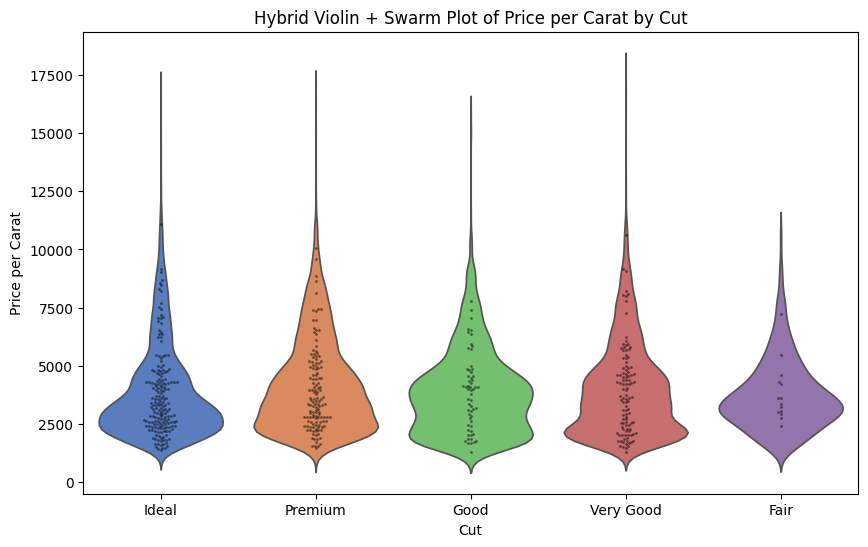

In [31]:
plt.figure(figsize=(10,6))
sns.violinplot(data=df, x="cut", y="price_per_carat", inner=None, palette="muted")
sns.swarmplot(data=df.sample(500), x="cut", y="price_per_carat", color="black", alpha=0.5, size=2)
plt.title("Hybrid Violin + Swarm Plot of Price per Carat by Cut")
plt.ylabel("Price per Carat")
plt.xlabel("Cut")
plt.show()


In [33]:
fig = px.scatter(
    df.sample(5000),
    x="carat", y="price",
    size="carat", color="cut",
    animation_frame="clarity",
    hover_name="color",
    opacity=0.7,
    title="Animated Bubble Chart: Carat vs Price across Clarity Levels"
)
fig.show()


In [34]:
import pandas as pd
import plotly.express as px

# Load dataset
df = pd.read_csv("diamonds.csv")
df["price_per_carat"] = df["price"] / df["carat"]

# Make a categorical price bucket (important for parallel_categories)
df["price_category"] = pd.qcut(df["price"], q=3, labels=["Low", "Medium", "High"])

# Parallel Categories Plot
fig = px.parallel_categories(
    df.sample(5000),   # sample to reduce lag
    dimensions=["cut", "color", "clarity", "price_category"],
    color="price_per_carat",   # must be a column name, not df["col"]
    color_continuous_scale=px.colors.sequential.Viridis,
    title="Parallel Categories: Cut → Color → Clarity → Price Category"
)

fig.show()
